In [1]:
# Turning all images into data

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
import os

In the previous code we saw that our images were different sizes.
In order to keep data consistent we must reduce the size of the image and make sure they are all the same size.
Packages such as Pillow can make this simple.

In [3]:
# Lets pick an example image
dir = "C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/train_images/train_images/img_2524489836547201.jpg"
image = Image.open(dir)

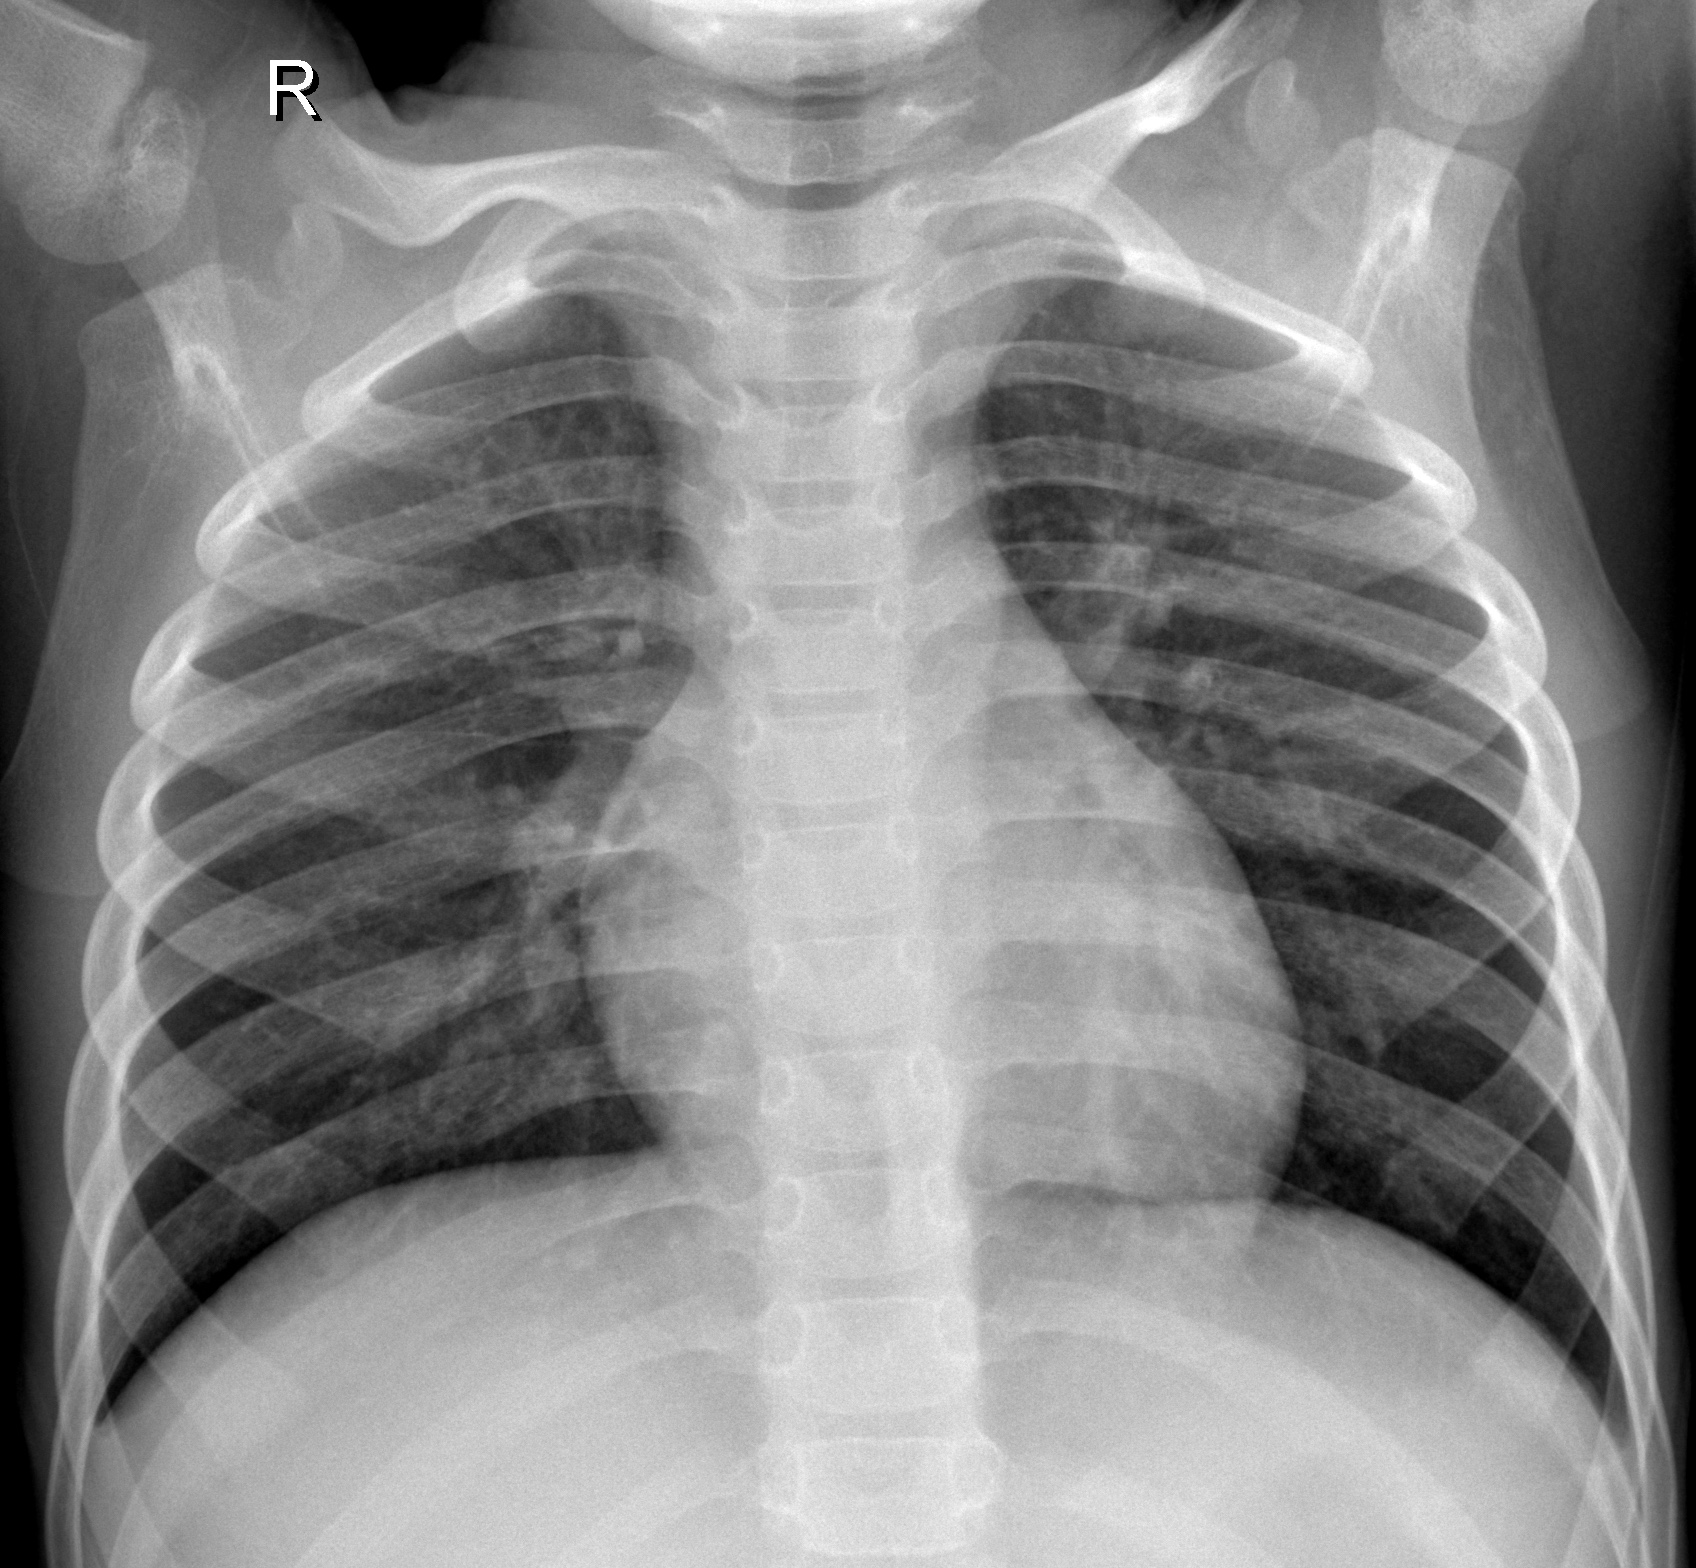

In [4]:
image

In [5]:
# Make sure image is in grayscale. Reduce Dimensionality.
image_gray = ImageOps.grayscale(image)

# Conventential Image sizes for training data can range from 64x64 to 256x256.
# The bigger the size, the more computational power is required.
# 64 * 64 = 4096 pixels. Each pixel will be a feature for our data.
IMAGE_LENGTH = 64
IMAGE_WIDTH = 64


#LANCOS and BICUBIC for quality, NEAREST is faster but lower quality.
# Resize our image
image_resized = image_gray.resize((IMAGE_LENGTH, IMAGE_WIDTH), Image.LANCZOS)

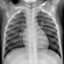

In [6]:
# View our resized image
image_resized

In [7]:
# Pass our Data into Numpy so we can flatten the image
img_arr = np.asarray(image_resized)
print(img_arr.shape) # 2D array img length * img width
img_arr # View array

(64, 64)


array([[122, 134, 126, ..., 106, 106, 107],
       [120, 126, 135, ..., 106, 103, 102],
       [123, 124, 128, ..., 102,  98,  89],
       ...,
       [  0,  24,  94, ..., 157, 121,  41],
       [  0,  21,  88, ..., 161, 125,  44],
       [  0,  17,  84, ..., 160, 129,  45]], dtype=uint8)

In [8]:
# flatten image so it can be put into our dataset. 1D Array.
img_flat = img_arr.flatten()

In [9]:
img_flat.shape

(4096,)

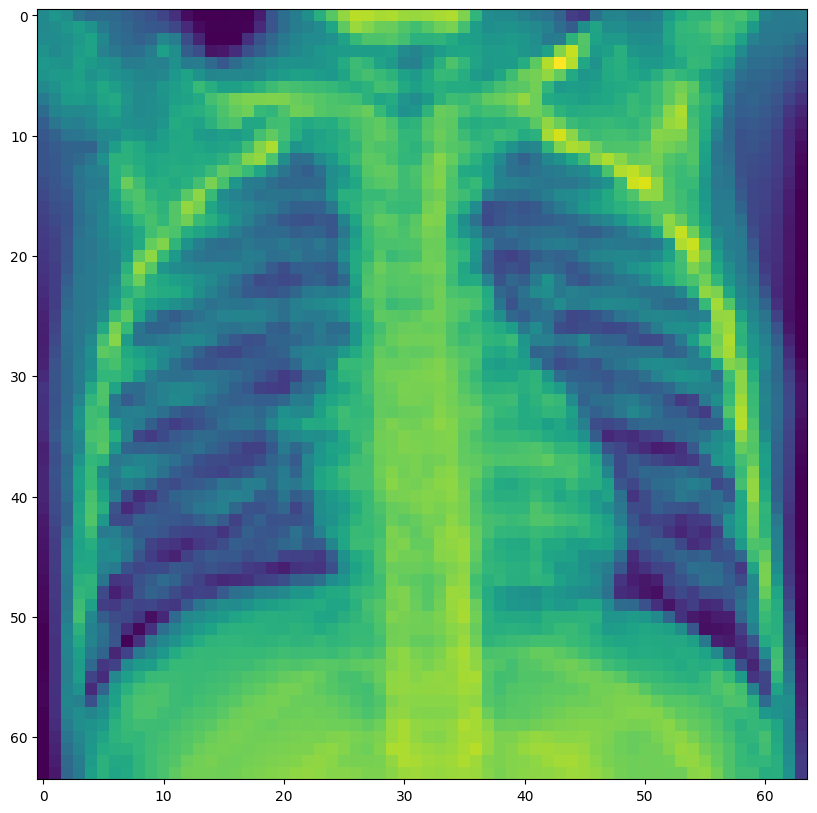

In [10]:
# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_arr)
plt.show()

Now that we have flattened one image, let's do it with all images and put them into a dataset.

In [11]:
# Load all training data
# 64x64 image
# Side Note: I also tested 128x128 data to see if we were losing any information while shrinking the image.
# In the end, results were not that much different so we were not losing information.
img_length = 64
img_width = 64
img_size = img_length * img_width #64 * 64 = 4096
flattened_training_images = [] # Store each flattened image
for dirname, _, filenames in os.walk('C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/train_images/train_images/'):
    for filename in filenames:
        image = Image.open(dirname+filename) # Open image
        image_gray = ImageOps.grayscale(image) # Turn image to grayscale
        image_resized = image_gray.resize((img_length,img_width), Image.LANCZOS) # Resize image
        img_arr = np.asarray(image_resized) # Turn image into numpy array
        img_flat = img_arr.flatten() # Flatten image into 1D array
        img_flat = np.append(img_flat, filename) # Append filename to array to keep track of each file
        flattened_training_images.append(img_flat) 

print(len(flattened_training_images))
print(flattened_training_images)

column_arr = [] # Create Columns for Dataset
for i in range(img_size):
    column_arr.append("pixel" + str(i))

column_arr.append("file")

df_train = pd.DataFrame(flattened_training_images, columns=column_arr) # Create Training Dataset Dataframe

4672
[array(['4', '3', '3', ..., '0', '0', 'img_1002194571005371555.jpg'],
      dtype='<U27'), array(['0', '13', '45', ..., '0', '0', 'img_1002972834724824498.jpg'],
      dtype='<U27'), array(['20', '20', '20', ..., '20', '20', 'img_1004160693662088646.jpg'],
      dtype='<U27'), array(['1', '11', '27', ..., '10', '0', 'img_1011159426506457600.jpg'],
      dtype='<U27'), array(['47', '77', '117', ..., '27', '36', 'img_1014387197248837154.jpg'],
      dtype='<U27'), array(['26', '11', '14', ..., '31', '31', 'img_1015181230713392388.jpg'],
      dtype='<U27'), array(['82', '85', '91', ..., '10', '20', 'img_1017234134520030571.jpg'],
      dtype='<U27'), array(['84', '81', '78', ..., '14', '18', 'img_1021261800276692992.jpg'],
      dtype='<U27'), array(['0', '0', '0', ..., '0', '0', 'img_1021686040379093880.jpg'],
      dtype='<U27'), array(['40', '46', '81', ..., '19', '35', 'img_1025257528384730581.jpg'],
      dtype='<U27'), array(['29', '33', '35', ..., '25', '26', 'img_10255592680

In [12]:
df_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file
0,4,3,3,2,1,0,0,0,0,2,...,135,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg
1,0,13,45,71,86,95,109,103,94,96,...,129,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg
2,20,20,20,20,20,20,20,20,20,20,...,110,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg
3,1,11,27,49,83,107,118,123,131,140,...,130,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg
4,47,77,117,79,140,64,55,62,69,67,...,138,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,203,186,167,63,30,35,41,52,51,50,...,86,95,77,48,17,9,15,16,18,img_994723291424300125.jpg
4668,88,90,93,103,115,126,121,126,128,129,...,192,186,177,161,124,60,36,48,51,img_995905878715598226.jpg
4669,92,102,179,120,73,73,83,83,74,67,...,99,51,10,17,22,24,23,24,23,img_998073497806386670.jpg
4670,52,65,73,81,87,80,104,133,175,203,...,179,170,171,132,93,40,0,0,0,img_999093464169498379.jpg


In [13]:
# Load Train labels so we can map each class to each image.
train_labels = pd.read_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/archive/labels_train.csv")
df_train_labels = df_train.merge(train_labels, how="inner", left_on="file", right_on="file_name")
df_train_labels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,41,0,0,0,0,0,0,img_1002194571005371555.jpg,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,33,0,0,0,0,0,0,img_1002972834724824498.jpg,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,13,21,20,20,20,20,20,img_1004160693662088646.jpg,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,135,112,99,65,32,10,0,img_1011159426506457600.jpg,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,117,68,51,36,17,27,36,img_1014387197248837154.jpg,img_1014387197248837154.jpg,1


In [14]:
# Drop identical Column
df_train_labels = df_train_labels.drop(columns=["file"])

In [15]:
df_train_labels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,file_name,class_id
0,4,3,3,2,1,0,0,0,0,2,...,108,41,0,0,0,0,0,0,img_1002194571005371555.jpg,1
1,0,13,45,71,86,95,109,103,94,96,...,99,33,0,0,0,0,0,0,img_1002972834724824498.jpg,1
2,20,20,20,20,20,20,20,20,20,20,...,53,13,21,20,20,20,20,20,img_1004160693662088646.jpg,0
3,1,11,27,49,83,107,118,123,131,140,...,149,135,112,99,65,32,10,0,img_1011159426506457600.jpg,2
4,47,77,117,79,140,64,55,62,69,67,...,136,117,68,51,36,17,27,36,img_1014387197248837154.jpg,1


In [16]:
# Test one image from dataset
df_plot_image = df_train_labels.loc[0]
df_plot_image = list(df_plot_image)
df_plot_image = df_plot_image[0:img_size]

In [17]:
# Make sure data is int type
for i in range(len(df_plot_image)):
    df_plot_image[i] = int(df_plot_image[i])
    
print(type(df_plot_image[0]))

<class 'int'>


In [18]:
# Reshape from 1D to 2D
df_train_image_reshape = np.reshape(df_plot_image,(img_length,img_width))

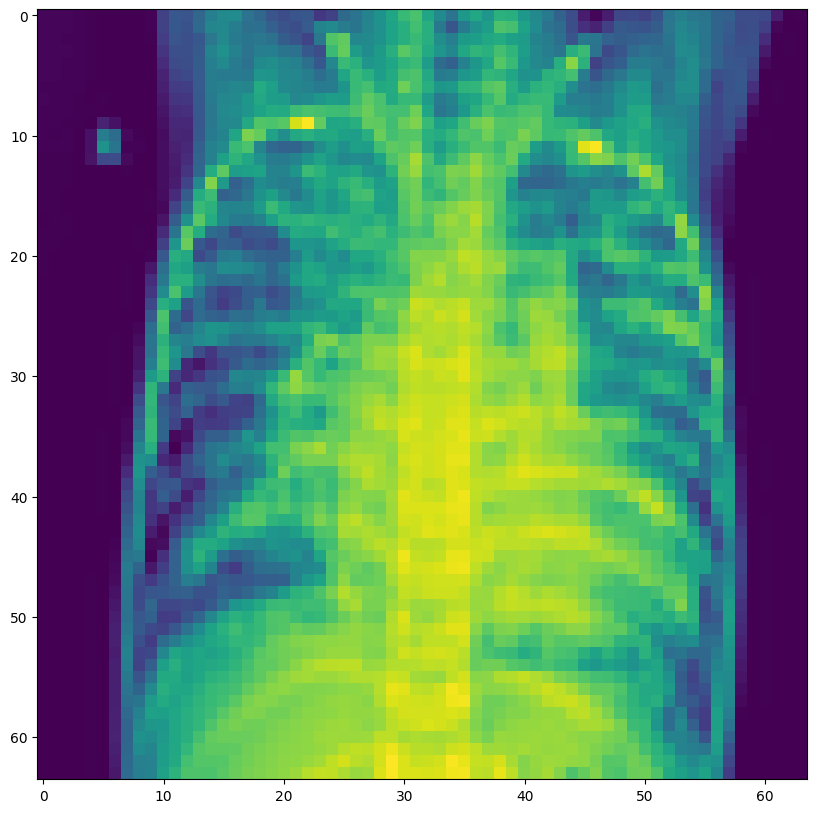

In [19]:
# Plot image
plt.figure(figsize=(10,10))
plt.imshow(df_train_image_reshape)
plt.show()

In [20]:
# Save final training data
df_train_labels.to_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_train_presentation.csv",index=False)

# For testing larger sizes
# df_train_labels.to_csv("C:/Users/conor/OneDrive/Desktop/school/Data Science Minor Independent Study/chest-xray-research/datasets/chest_xray_train_large.csv",index=False)